In [48]:
import chipwhisperer as cw
scope = cw.scope()
target = cw.target(scope)
scope.default_setup()

In [99]:
from tqdm.notebook import trange
import numpy as np

scope.io.tio1 = 'serial_tx'
scope.io.tio2 = 'serial_rx'
scope.trigger.triggers = "nrst"

scope.gain.db = 56
scope.adc.samples = 10
scope.adc.offset = 0
scope.adc.decimate = 1
scope.clock.clkgen_freq = 4000000 
N = 5000000

cmd=bytearray([255]*1)

ktp = cw.ktp.Basic() 
ktp.setInitialKey("54 ee ff 11 21 32 eb 43 bb aa ff 23 98 54 12 12")

In [96]:
#%run "../swaes/real_time_plot.ipynb"
#plot = real_time_plot(plot_len=scope.adc.samples-1)

In [97]:
traces_enc = []
text_arrays = []
key_arrays = []

In [100]:
for i in trange (N-len(traces_enc)):
#for i in trange (1):
    scope.arm()
    key, text = ktp.next() 
    target.write(cmd+text)
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        break
    trace = scope.get_last_trace()
    #plot.send(trace)
    traces_enc.append(np.asarray(trace))
    text_arrays.append(np.asarray(text))

In [83]:
#ktp = cw.ktp.Basic() 
#ktp.setInitialKey("ca fe ba be de ad be ef de ad be ef 65 23 67 23")
#key, text = ktp.next() 
#target.write(cmd+key)

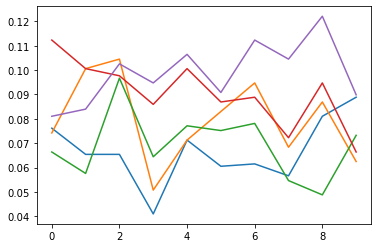

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
for i in range (5):
    plt.plot(traces_enc[i])
plt.show()

# Save

In [103]:
np.array(text_arrays).tofile("pt_5m_10.bin")

In [104]:
np.array(traces_enc).tofile("t_5m_10.bin")

In [108]:
len(text_arrays)

5000000